In [422]:
#from sklearn.datasets import load_boston
#from sklearn.datasets import load_boston

import seaborn as sns
import csv
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import statsmodels.api as sm
import pandas as pd
import numpy as np
import joblib
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import r2_score


In [423]:
df=pd.read_csv('Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


#
# Missing Values

In [424]:

df.shape


(545, 13)

In [425]:
df = pd.read_csv('Housing.csv')
df = df.dropna(thresh=df.shape[1]-10)
df.to_csv('Housing2.csv', index=False)

In [426]:
df.shape

(545, 13)

#
#
# duplicating

In [427]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
540    False
541    False
542    False
543    False
544    False
Length: 545, dtype: bool

In [428]:
df.drop_duplicates(inplace=True)

In [429]:
df.shape

(545, 13)

# cleaing

In [430]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [431]:
df['mainroad'].unique()

array(['yes', 'no'], dtype=object)

In [432]:
df['mainroad'] = df['mainroad'].replace('yes', 1)
df['mainroad'] = df['mainroad'].replace('no', 0)
df['mainroad'].unique()

C:\Users\User\AppData\Local\Temp\ipykernel_21008\588680157.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['mainroad'] = df['mainroad'].replace('no', 0)


array([1, 0], dtype=int64)

In [433]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    int64 
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(7), object(6)
memory usage: 55.5+ KB


In [434]:
df['guestroom'].unique()

array(['no', 'yes'], dtype=object)

In [435]:
df['guestroom'] = df['guestroom'].replace('yes', 1)
df['guestroom'] = df['guestroom'].replace('no', 0)
df['guestroom'].unique()

C:\Users\User\AppData\Local\Temp\ipykernel_21008\4199147859.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['guestroom'] = df['guestroom'].replace('no', 0)


array([0, 1], dtype=int64)

In [436]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    int64 
 6   guestroom         545 non-null    int64 
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(8), object(5)
memory usage: 55.5+ KB


In [437]:
df['basement'].unique()

array(['no', 'yes'], dtype=object)

In [438]:
df['basement'] = df['basement'].replace('yes', 1)
df['basement'] = df['basement'].replace('no', 0)
df['basement'].unique()

C:\Users\User\AppData\Local\Temp\ipykernel_21008\3077343242.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['basement'] = df['basement'].replace('no', 0)


array([0, 1], dtype=int64)

In [439]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    int64 
 6   guestroom         545 non-null    int64 
 7   basement          545 non-null    int64 
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(9), object(4)
memory usage: 55.5+ KB


In [440]:
df['hotwaterheating'].unique()

array(['no', 'yes'], dtype=object)

In [441]:
df['hotwaterheating'] = df['hotwaterheating'].replace('yes', 1)
df['hotwaterheating'] = df['hotwaterheating'].replace('no', 0)
df['hotwaterheating'].unique()

C:\Users\User\AppData\Local\Temp\ipykernel_21008\3927232989.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['hotwaterheating'] = df['hotwaterheating'].replace('no', 0)


array([0, 1], dtype=int64)

In [442]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    int64 
 6   guestroom         545 non-null    int64 
 7   basement          545 non-null    int64 
 8   hotwaterheating   545 non-null    int64 
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(10), object(3)
memory usage: 55.5+ KB


In [443]:
df['airconditioning'].unique()

array(['yes', 'no'], dtype=object)

In [444]:
df['airconditioning'] = df['airconditioning'].replace('yes', 1)
df['airconditioning'] = df['airconditioning'].replace('no', 0)
df['airconditioning'].unique()

C:\Users\User\AppData\Local\Temp\ipykernel_21008\487392998.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['airconditioning'] = df['airconditioning'].replace('no', 0)


array([1, 0], dtype=int64)

In [445]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    int64 
 6   guestroom         545 non-null    int64 
 7   basement          545 non-null    int64 
 8   hotwaterheating   545 non-null    int64 
 9   airconditioning   545 non-null    int64 
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(11), object(2)
memory usage: 55.5+ KB


In [446]:
df['prefarea'].unique()

array(['yes', 'no'], dtype=object)

In [447]:
df['prefarea'] = df['prefarea'].replace('yes', 1)
df['prefarea'] = df['prefarea'].replace('no', 0)
df['prefarea'].unique()

C:\Users\User\AppData\Local\Temp\ipykernel_21008\3431335589.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['prefarea'] = df['prefarea'].replace('no', 0)


array([1, 0], dtype=int64)

In [448]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    int64 
 6   guestroom         545 non-null    int64 
 7   basement          545 non-null    int64 
 8   hotwaterheating   545 non-null    int64 
 9   airconditioning   545 non-null    int64 
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    int64 
 12  furnishingstatus  545 non-null    object
dtypes: int64(12), object(1)
memory usage: 55.5+ KB


In [449]:
df['furnishingstatus'].unique()

array(['furnished', 'semi-furnished', 'unfurnished'], dtype=object)

In [450]:
df['furnishingstatus'] = df['furnishingstatus'].replace('semi-furnished', 1)
df['furnishingstatus'] = df['furnishingstatus'].replace('unfurnished', 0)
df['furnishingstatus'] = df['furnishingstatus'].replace('furnished', 2)
df['furnishingstatus'].unique()

C:\Users\User\AppData\Local\Temp\ipykernel_21008\2189293045.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['furnishingstatus'] = df['furnishingstatus'].replace('furnished', 2)


array([2, 1, 0], dtype=int64)

In [451]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   price             545 non-null    int64
 1   area              545 non-null    int64
 2   bedrooms          545 non-null    int64
 3   bathrooms         545 non-null    int64
 4   stories           545 non-null    int64
 5   mainroad          545 non-null    int64
 6   guestroom         545 non-null    int64
 7   basement          545 non-null    int64
 8   hotwaterheating   545 non-null    int64
 9   airconditioning   545 non-null    int64
 10  parking           545 non-null    int64
 11  prefarea          545 non-null    int64
 12  furnishingstatus  545 non-null    int64
dtypes: int64(13)
memory usage: 55.5 KB


In [452]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

# 
#
#
#
#
# Handling Outlieries  

In [453]:
import pandas as pd

# Assuming df is already defined and contains the necessary data

# Identify numeric columns
numeric_cols = df.select_dtypes(include=['int', 'float']).columns

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    median = df[col].median()
    
    # Replace outliers with the median
    df.loc[(df[col] < lower_bound) | (df[col] > upper_bound), col] = median

# Optionally, reset the index if needed
df.reset_index(drop=True, inplace=True)

# Now df has outliers replaced with the median

In [454]:
df.shape

(545, 13)

# 
#
#
#
#
# Visualization  

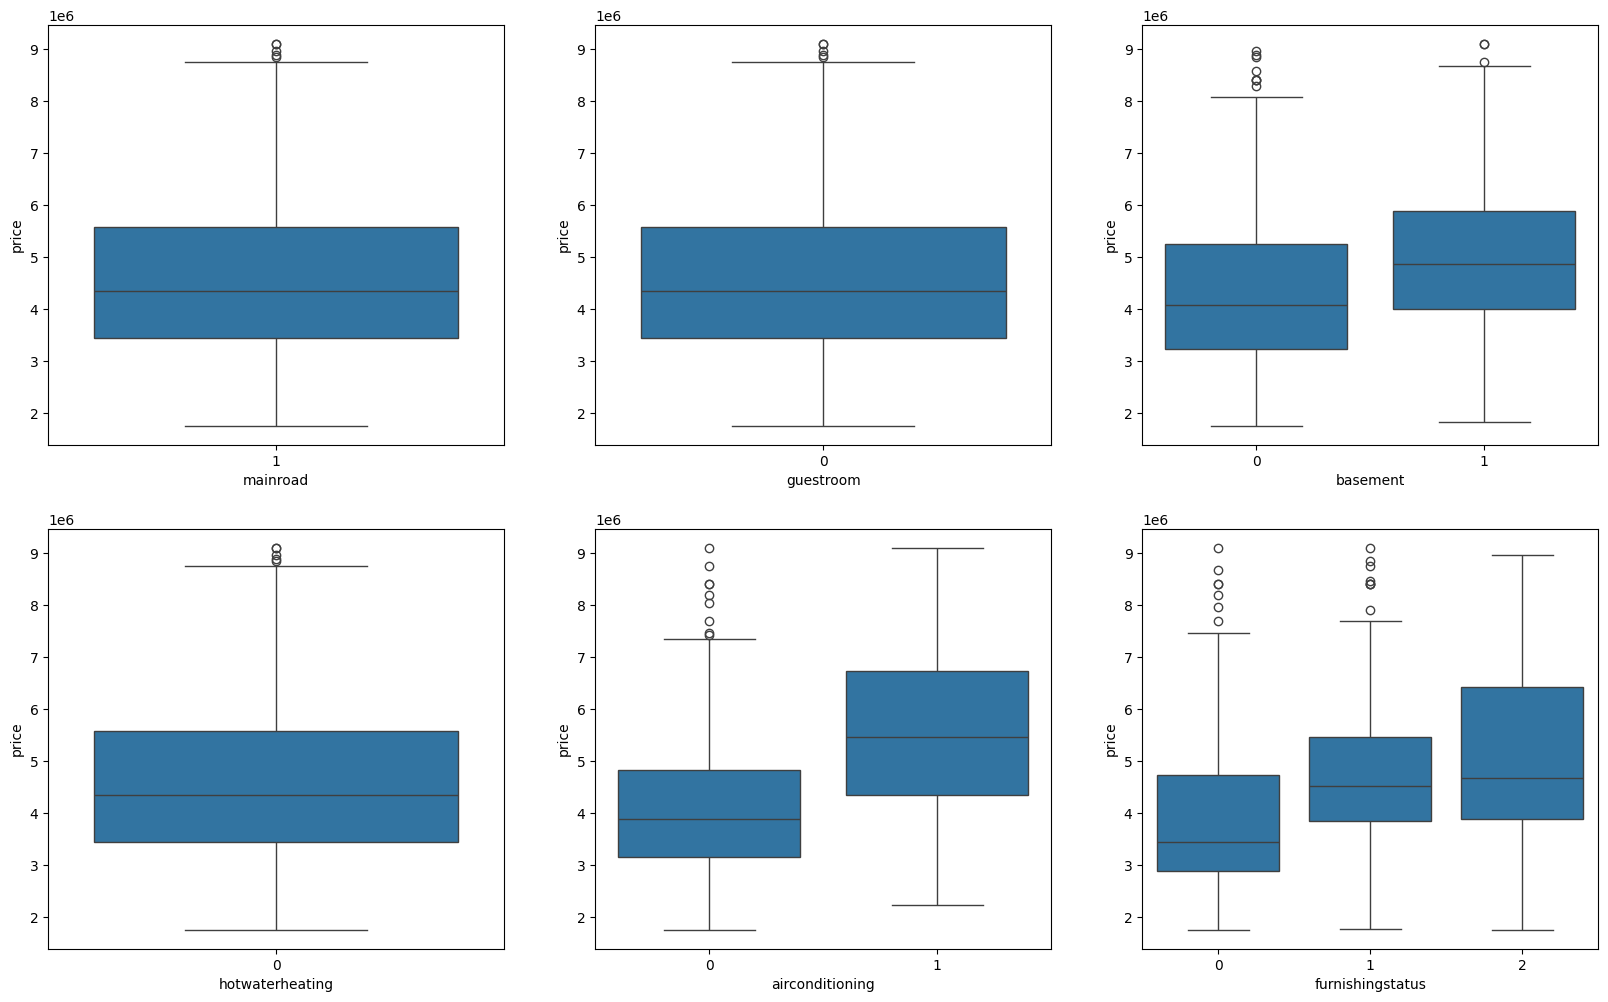

In [455]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'mainroad', y = 'price', data = df)
plt.subplot(2,3,2)
sns.boxplot(x = 'guestroom', y = 'price', data = df)
plt.subplot(2,3,3)
sns.boxplot(x = 'basement', y = 'price', data = df)
plt.subplot(2,3,4)
sns.boxplot(x = 'hotwaterheating', y = 'price', data = df)
plt.subplot(2,3,5)
sns.boxplot(x = 'airconditioning', y = 'price', data = df)
plt.subplot(2,3,6)
sns.boxplot(x = 'furnishingstatus', y = 'price', data = df)
plt.show()

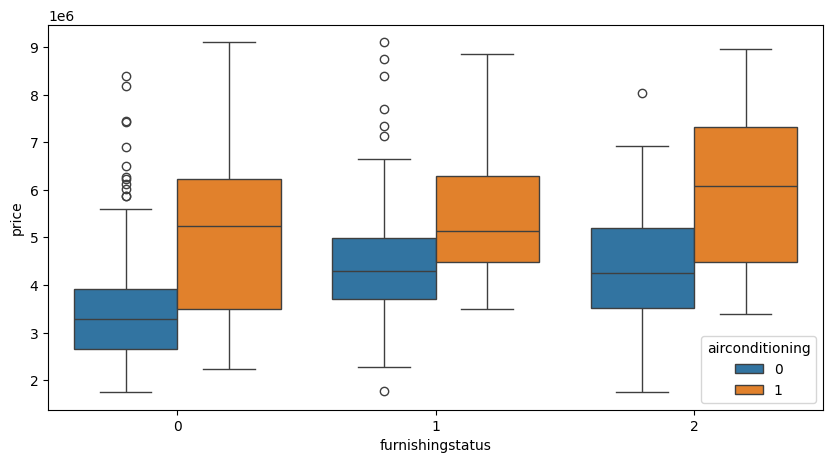

In [456]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'furnishingstatus', y = 'price', hue = 'airconditioning', data = df)
plt.show()

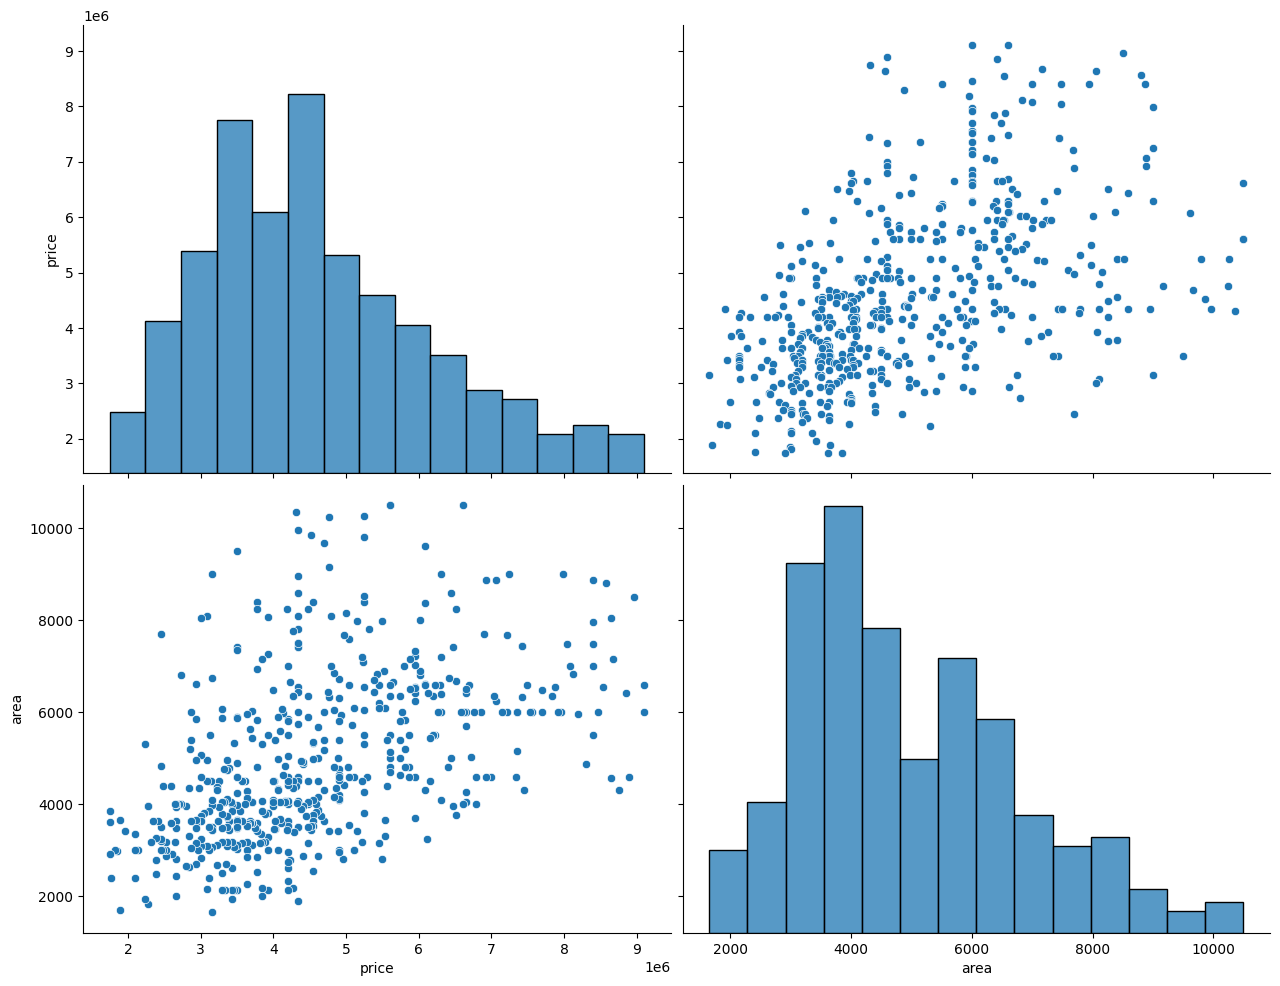

In [457]:
sns.pairplot(df, vars = ['price', 'area'], height=5, aspect=1.3)

In [458]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,4340000,7420,4,2,3,1,0,0,0,1,2,0,2
1,4340000,8960,4,1,2,1,0,0,0,1,0,0,2
2,4340000,9960,3,2,2,1,0,1,0,0,2,0,1
3,4340000,7500,4,2,2,1,0,1,0,1,0,0,2
4,4340000,7420,4,1,2,1,0,1,0,1,2,0,2


# 
#
#
#
#
# Building The Models  

In [459]:
df = pd.get_dummies(df)
X = df.drop('price', axis=1)  
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 44 ,shuffle=True)
common_columns = X_train.columns.intersection(X_test.columns)
X_train = X_train[common_columns]
X_test = X_test[common_columns]
regressor = LinearRegression()
regressor.fit(X_train, y_train)
regressor.score(X_train, y_train)
regressor.score(X_train, y_train)
y_pred = regressor.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")
MSEValue = mean_squared_error(y_test, y_pred) 
print('Mean Squared Error Value is : ', MSEValue)
r2 = r2_score(y_test, y_pred)
print(f"R² score: {r2}")

Mean Absolute Error: 718384.134519391
Mean Squared Error Value is :  829065436226.7498
R² score: 0.599474760798083
